In [25]:
# Houman Alizadeh
# Homework Lecture 22
import pandas as pd 
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score

estimator = KNeighborsClassifier()

In [43]:
wine = datasets.load_wine()
X = wine.data
Y = wine.target
pca = decomposition.PCA(n_components=2)
pca.fit(X)
P = pca.transform(X)
print(P)

[[ 3.18562979e+02  2.14921307e+01]
 [ 3.03097420e+02 -5.36471768e+00]
 [ 4.38061133e+02 -6.53730945e+00]
 [ 7.33240139e+02  1.92729032e-01]
 [-1.15714285e+01  1.84899946e+01]
 [ 7.03231192e+02 -3.32158674e-01]
 [ 5.42971581e+02 -1.35189666e+01]
 [ 5.48401860e+02  1.14494324e+01]
 [ 2.98036863e+02 -8.18015784e+00]
 [ 2.98049553e+02 -7.10154294e+00]
 [ 7.63079712e+02 -8.33431723e+00]
 [ 5.32943228e+02 -1.42876338e+01]
 [ 5.72834410e+02 -2.10050143e+01]
 [ 4.02925358e+02 -1.61026352e+01]
 [ 8.00053394e+02 -1.21184472e+01]
 [ 5.63245578e+02  2.21482866e+00]
 [ 5.33379651e+02  1.08048022e+01]
 [ 3.83317591e+02  8.47741982e+00]
 [ 9.33118387e+02 -8.35447844e+00]
 [ 9.84031775e+01  1.43926594e+01]
 [ 3.35935940e+01  2.55679565e+01]
 [ 2.31464375e+01  1.81747309e+00]
 [ 2.88093030e+02 -3.96304175e+00]
 [ 2.67981513e+02 -9.57070401e+00]
 [ 9.80198858e+01 -5.49584606e+00]
 [ 8.34987440e+01  2.28916215e+01]
 [ 4.47925596e+02 -1.47973313e+01]
 [ 5.37919165e+02 -1.53883461e+01]
 [ 1.68210468e+02  4

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=10)
estimator = KNeighborsClassifier(n_neighbors=3, weights="distance")
estimator.fit(X_train, y_train)
Predict = estimator.predict(X_test)
accuracy = np.mean(y_test == Predict) *100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 71.1%


In [31]:
scores = cross_val_score(estimator, X, Y, scoring = 'accuracy')
average_accuracy = np.mean(scores)*100
print("The accuracy is {0:.1f}%".format(average_accuracy))


The accuracy is 66.4%


C:\Users\Patron\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [39]:
avg_scores = []
all_scores = []
parameters = list(range(1,20))
for n_neighbors in parameters:
    estimator = KNeighborsClassifier()
    scores = cross_val_score(estimator, X, Y, scoring = 'accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

C:\Users\Patron\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Patron\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Patron\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Patron\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\model_selectio

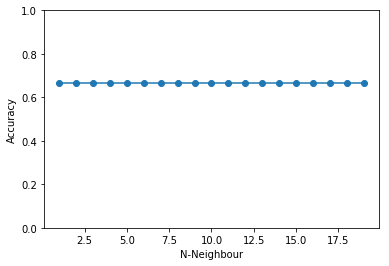

In [42]:
plt.plot(parameters, avg_scores, '-o')
plt.xlabel('N-Neighbour')
plt.ylabel('Accuracy')
plt.ylim([0,1.0])

plt.show()
